# Kidney Stone Prediction v2

2nde Analysis, prediction , try to improve the previous analysis- prediction , adding some step in my ProjectBuildings 

## Preparation

In [1]:
# Importing libraries

# Data Handling 
import pandas as pd
import numpy as np 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Machine Learning Classification Models 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,StackingClassifier
from sklearn.ensemble import StackingClassifier

# Preprocessing imports
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split

# Metrics imports
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Tuning
import optuna

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

loading data

In [2]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


original_df = pd.read_csv('./kindey stone urine analysis.csv')

making functionto inspect data

In [3]:



def inspect_data(df):
    print(f'\n the dataset has {df.shape[0]} rows and {df.shape[1]} attributes ')
    print(f'\n Null Values:\n{df.isnull().sum()}')
    print(f'\n Duplicates: {df.duplicated().sum()}')
    print(f'\n Data Types:\n{df.dtypes}')



In [4]:
inspect_data(train)


 the dataset has 414 rows and 8 attributes 

 Null Values:
id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

 Duplicates: 0

 Data Types:
id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object


In [5]:


inspect_data(test)




 the dataset has 276 rows and 7 attributes 

 Null Values:
id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

 Duplicates: 0

 Data Types:
id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
dtype: object


In [6]:


inspect_data(original_df)




 the dataset has 79 rows and 7 attributes 

 Null Values:
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

 Duplicates: 0

 Data Types:
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object


## Adversarial Validation

The Adversarial Validation is an important step to decide whether it is adequate to merge the train dataframe and the original dataframe based on how different they are from each other.

We're going to use a classifier to see how well it can distinguish the data sample originated from the original dataset and the train dataset. If our classifier have an AUC score below 0.5, we can infer that there is not much difference between both datasets, and it's safe to merge them. 

In [7]:
# Labeling data samples from the training set as 'is_train' = 1
train['is_train'] = 1
train

,id,gravity,ph,osmo,cond,urea,calc,target,is_train
0,0,1.013,6.19,443,14.8,124,1.45,0,1
1,1,1.025,5.40,703,23.6,394,4.18,0,1
2,2,1.009,6.13,371,24.5,159,9.04,0,1
3,3,1.021,4.91,442,20.8,398,6.63,1,1
4,4,1.021,5.53,874,17.8,385,2.21,1,1
...,...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0,1
410,410,1.024,5.53,577,19.7,224,0.77,0,1
411,411,1.018,6.28,455,22.2,270,7.68,1,1
412,412,1.008,7.12,325,12.6,75,1.03,1,1


In [8]:
# Labeling data samples from the original set as 'is_train' = 0
original_df['is_train'] = 0
original_df

,gravity,ph,osmo,cond,urea,calc,target,is_train
0,1.021,4.91,725,14.0,443,2.45,0,0
1,1.017,5.74,577,20.0,296,4.49,0,0
2,1.008,7.20,321,14.9,101,2.36,0,0
3,1.011,5.51,408,12.6,224,2.15,0,0
4,1.005,6.52,187,7.5,91,1.16,0,0
...,...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1,0
75,1.017,4.81,410,13.3,195,0.58,1,0
76,1.024,5.40,803,21.8,394,7.82,1,0
77,1.016,6.81,594,21.4,255,12.20,1,0


In [9]:
# Creating a new dataset by concatenating the train test and the original set
av_df = pd.concat([train, original_df], axis = 0)
av_df = av_df.sample(frac = 1, random_state = 42) # Shuffling data
av_df

,id,gravity,ph,osmo,cond,urea,calc,target,is_train
40,NaN,1.021,5.33,815,26.0,385,2.66,0,0
73,73.0,1.024,5.24,1236,27.6,620,7.82,0,1
310,310.0,1.021,5.44,721,29.0,239,2.45,0,1
175,175.0,1.007,6.63,253,8.4,133,1.03,0,1
332,332.0,1.025,5.56,840,8.8,395,2.03,0,1
...,...,...,...,...,...,...,...,...,...
106,106.0,1.019,6.13,594,27.6,418,1.49,0,1
270,270.0,1.015,5.35,559,8.1,301,3.98,0,1
348,348.0,1.025,5.68,854,29.0,385,3.98,1,1
21,NaN,1.019,5.47,760,33.8,199,0.81,0,0


In [10]:
av_df['is_train'].value_counts() # Counting is_train values

1    414
0     79
Name: is_train, dtype: int64

 There's a strong class imbalance in our dataset. 414 data samples are from the train set, while only 79 comes from the original dataset.

We're going to use the StratifiedKFold to perform cross-validation for this adversarial validation, since it is more adequate when dealing with strong class imbalance.

In [11]:
X = av_df.drop(['is_train', 'id'], axis = 1) # Independent variables
y = av_df.is_train # Target variable


#### Initiating XGBClassifier to perform a binary logistic classification

In [12]:



xgb_model = XGBClassifier(objective  = 'binary:logistic',
            random_state = 42)



#### Initiating StratifiedKFold

In [13]:

cv = StratifiedKFold(n_splits = 5,  # 5 Folds
                    shuffle = True, # Shuffling data samples
                    random_state = 42)

In [14]:
# Performing Cross-Validation
cross_val_scores = []

for i,(train_av, test_av) in enumerate(cv.split(X,y)):
    X_train, X_test = X.iloc[train_av], X.iloc[test_av]
    y_train, y_test = y.iloc[train_av], y.iloc[test_av]
    
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    cross_val_scores.append(score)
    
    print(f"Fold {i+1}, AUC Score = {score:.3f}")

Fold 1, AUC Score = 0.239
Fold 2, AUC Score = 0.294
Fold 3, AUC Score = 0.142
Fold 4, AUC Score = 0.157
Fold 5, AUC Score = 0.303


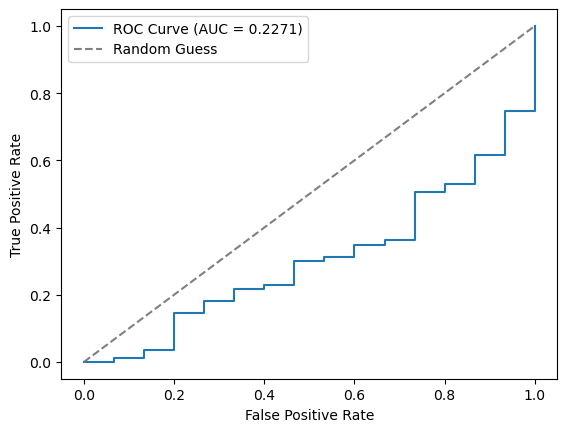

In [15]:
# Computing the mean AUC scores
mean_auc_score = np.mean(cross_val_scores)

# Plotting AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = 'ROC Curve (AUC = %0.4f)' % mean_auc_score)

plt.plot([0,1], [0,1], linestyle = '--', color = 'gray', label = 'Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

the classifier can't distinguish between data samples from the original and train sets. This is a good indicator that these datasets are extremely similar on their distribution and we can merge them to form a larger training set.

In [16]:


# Creating new training set by concatenating the original_df and train set
train_df = pd.concat([original_df, train], axis = 0)
train_df



,gravity,ph,osmo,cond,urea,calc,target,is_train,id
0,1.021,4.91,725,14.0,443,2.45,0,0,NaN
1,1.017,5.74,577,20.0,296,4.49,0,0,NaN
2,1.008,7.20,321,14.9,101,2.36,0,0,NaN
3,1.011,5.51,408,12.6,224,2.15,0,0,NaN
4,1.005,6.52,187,7.5,91,1.16,0,0,NaN
...,...,...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0,1,409.0
410,1.024,5.53,577,19.7,224,0.77,0,1,410.0
411,1.018,6.28,455,22.2,270,7.68,1,1,411.0
412,1.008,7.12,325,12.6,75,1.03,1,1,412.0


In [17]:
train_df.drop(['id', 'is_train'], axis = 1, inplace = True) # Removing 'id' and 'is_train' columns
train_df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0
410,1.024,5.53,577,19.7,224,0.77,0
411,1.018,6.28,455,22.2,270,7.68,1
412,1.008,7.12,325,12.6,75,1.03,1


## EDA

 Our training dataset has the following attributes:


.gravity: Gravity measures the density of the urine compared to water. A higher gravity in this case can be an indicator of substances in the urine that can lead to the increased risk of stone formation.

.ph: The ph measures the acidity of the urine. Overall, both a low ph and a high ph can lead to increased risk of stone formation.

.osmo: The osmolarity is proportional to the concentration of molecules in the urine.

.cond: The conductivity measures the ability of urine to conduct an electrical current. A higher level of conductivity may also be an indicator of increased risk for stone formation.

.urea: This is the measure of the concentration of urea, which is a waste product of protein metabolism, in urine.

.calc: A high concentration of calcium in the urine can be a contributor to the formation of kidney stones.


###  Analyze is the distribution of the target variable.

In [18]:


# Counting values in 'target' variable
target_count = train['target'].value_counts()
# Creating a new dataframe containing the values of each label
values = pd.DataFrame({'target': target_count.index, 'count': target_count.values})
# Plotting a pie plot 
fig = px.pie(values,
            values = 'count', 
            names = 'target',
            template = 'ggplot2', 
            title = 'Target Variable Distribution')
fig.update_traces(hole = .4)
fig.show()



Most patients, about 55.6% of them, do not have kidney stones.

Even though we have more samples of people without kidney stones, the data imbalance isn't really much strong here.

#### Checking Distribution

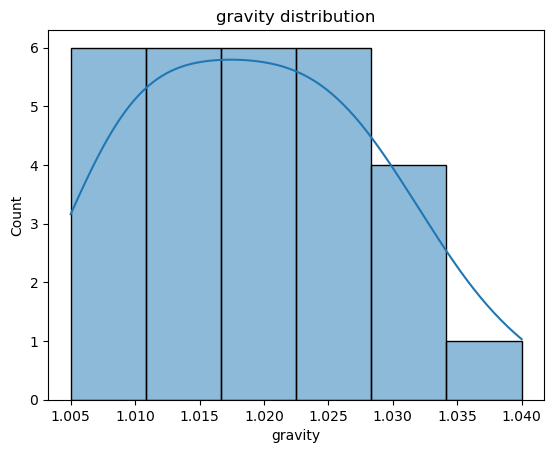

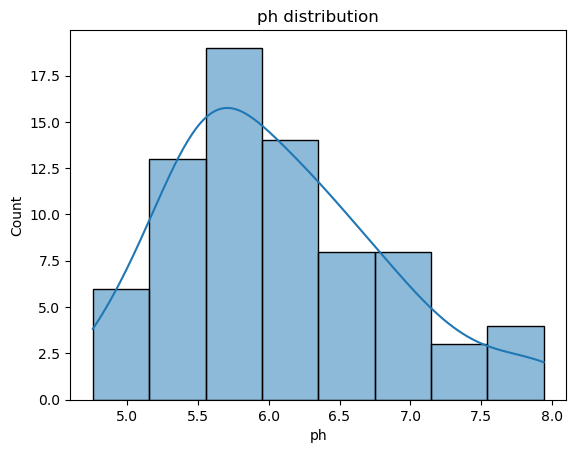

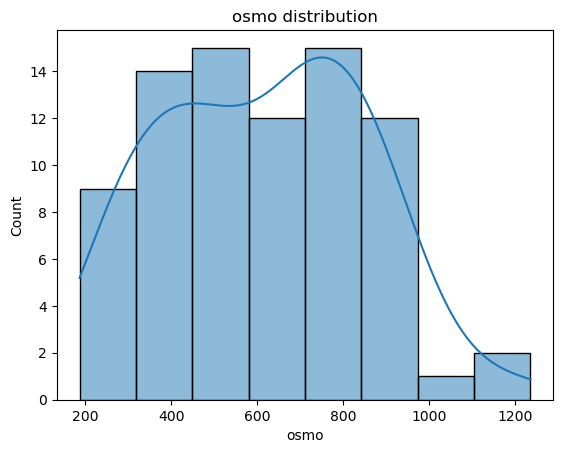

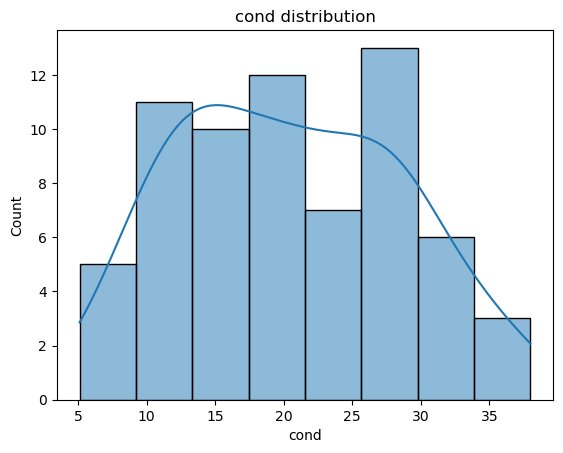

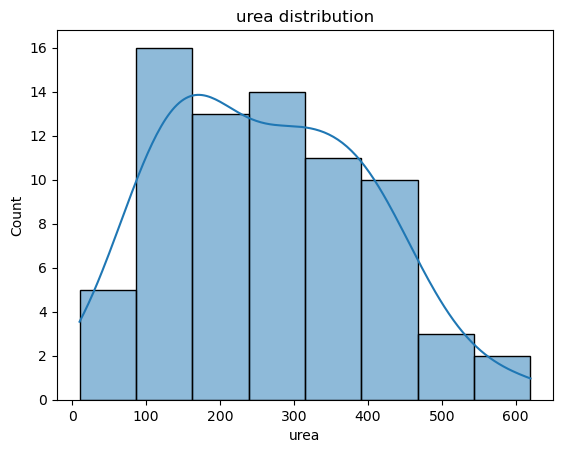

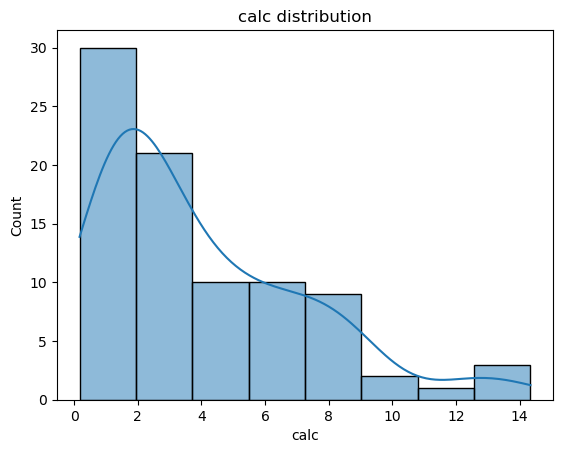

In [23]:


# Listing columns for data analysis
cols = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

for col in cols:
    plt.figure()
    sns.histplot(data=train_df.groupby(col).mean(), x=col, kde=True)
    plt.title(f'{col} distribution')
plt.show()


We can observe The attributes are  not normally distributed, which indicates we may need to:

 transform them to a gaussian-like distribution.

#### Checking outliers

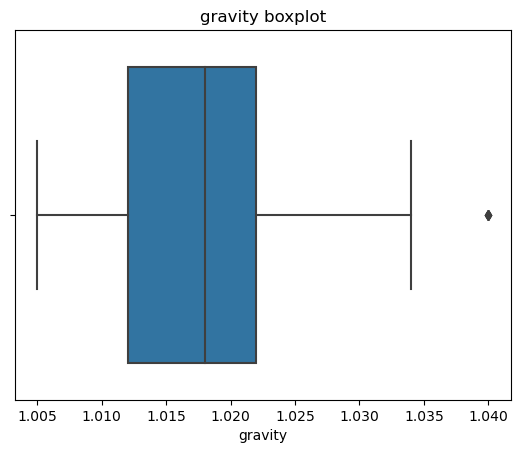

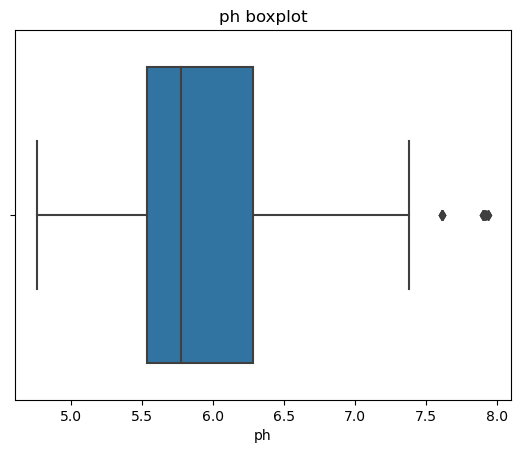

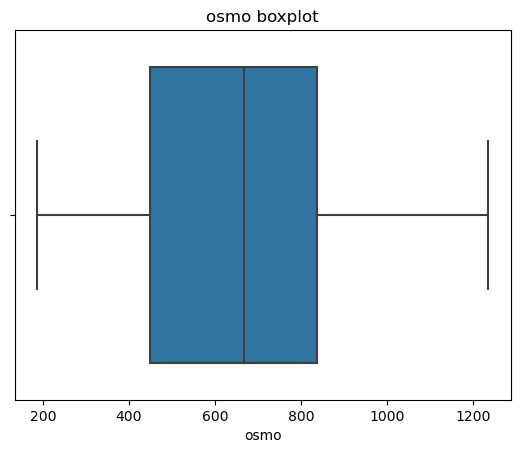

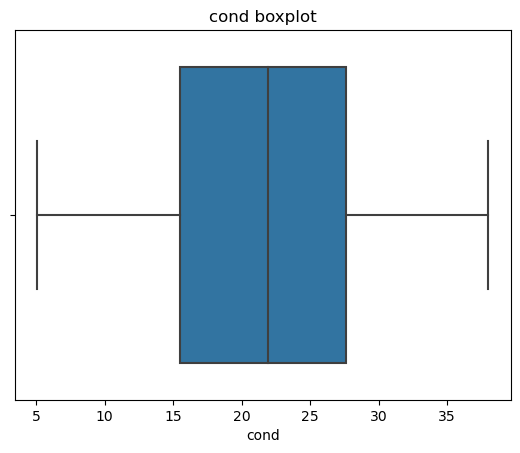

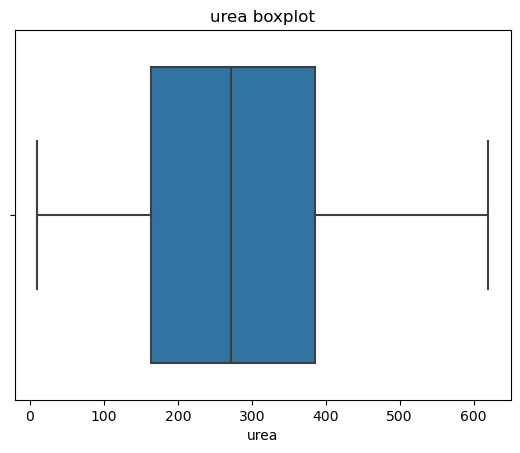

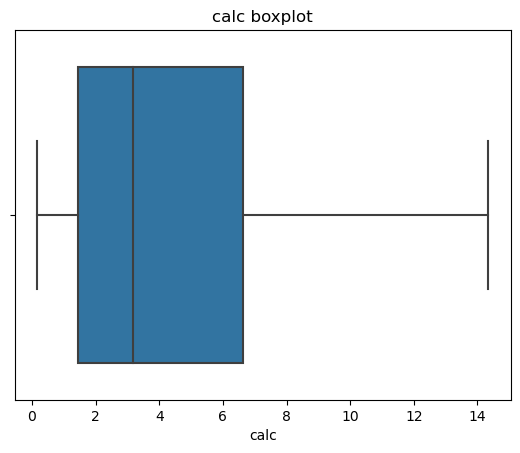

In [24]:
# Plotting boxplots
for col in cols:
    plt.figure()
    sns.boxplot(data = train_df, x = col)
    plt.title(f'{col} boxplot')
plt.show()

There are outliers in gravity and ph, which we may have to deal with later on.

#### Checking Correlation

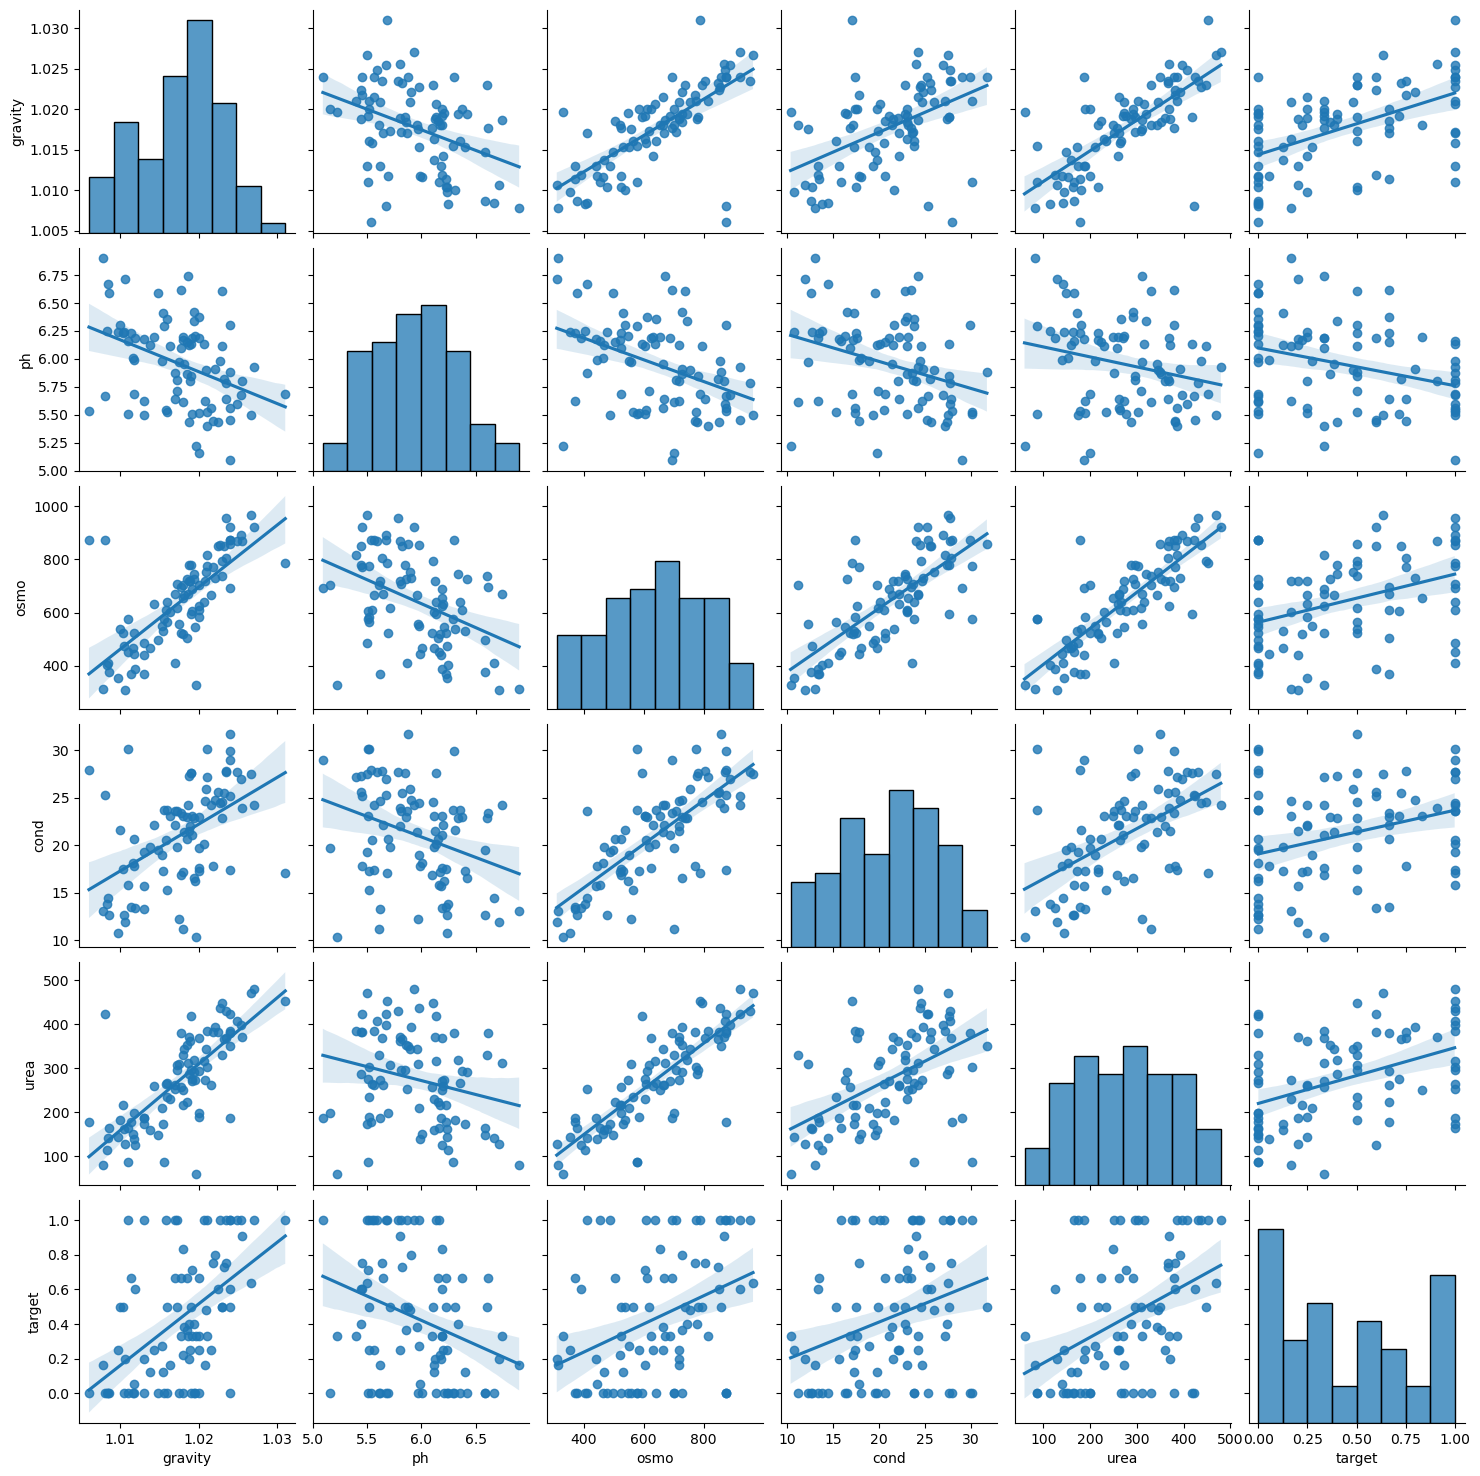

In [26]:
# Plotting pairplots to observe relationship among features
sns.pairplot(train_df.groupby(col).mean(), kind = 'reg')
plt.show()

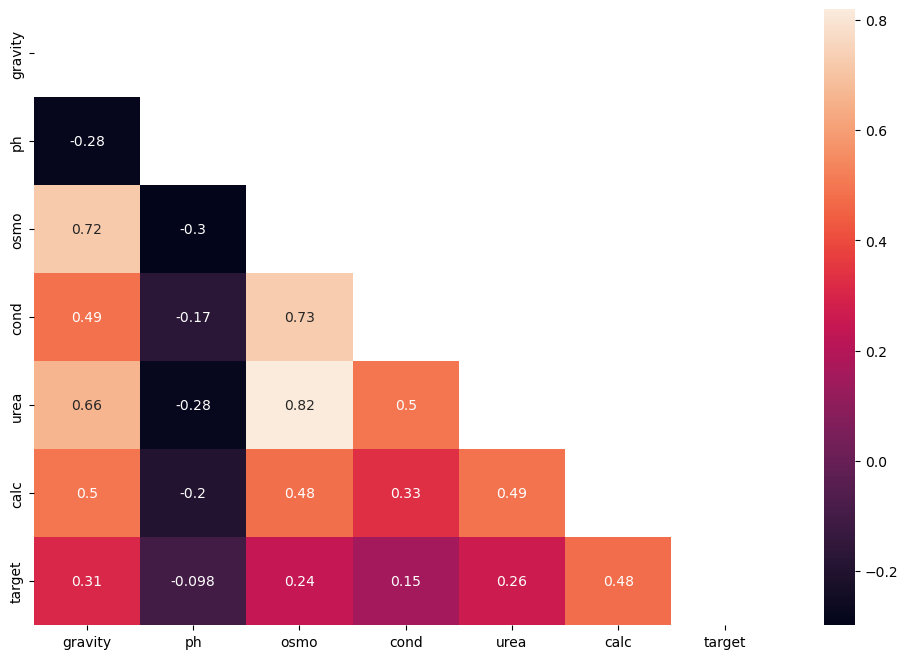

In [27]:
# Plotting correlation heatmap 
plt.figure(figsize = (12,8))
corr = train_df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, mask = mask)
plt.show()

We can see the strongest correlation are :

. osmo and urea (0.82)

. osmo and cond (0.73)

. urea and gravity (0.66)

#### Checking target's pattern

In [28]:
# Boxplots by target
for col in cols:
    fig = px.box(train_df, 
                 y='urea', x='target', 
                 color='target', 
                 title=f'Boxplots of {col} by Target', template='ggplot2', height = 600)

    fig.show()

Overall, patients with kidney stones present higher levels of concentration of gravity, osmo, calc, urea, and higher ph than those who are not suffering with kidney stones. We found a relevant pattern.

## Feature Engineering & Modeling

To increase the predictive powers of our models, I am going to add the following features to our datasets:

. osmo-to-urea-ratio: Osmo divided by urea.

. osmo-to-cond-diff: Osmo subtracted by cond.

. calc-to-ph-ratio: Calc divided by ph.

. osmo-to-urea-diff: Osmo subtracted by urea.

. ph-category: A categorical feature that is going to classify any ph below 6 as “acidic”, ph between 6 and 8 as “natural”, and ph above 8 as “basic”.

In [29]:
# Independent feature
X = train_df.drop('target', axis = 1)
y = train_df.target # Target variable

In [30]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .7, random_state = 42) # 70% of data for training

 The FeatureEngineering class below performs a bunch of transformation to the data that are going to be added to a Pipeline.

First, we create the new features by performing operations on the input data. Then, we use RobustScaler, which is effective against outliers, to standardize the data. The next step is to use QuantileTransformer to normalize the data into a gaussian-like distribution. Lastly, this is going to return the X variables transformed, standardized, and with new features. 

In [32]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        # New Features
        X['osmo-to-urea-ratio'] = X['osmo'] / X['urea']
        X['osmo-to-cond-dff'] = X['osmo'] - X['cond']
        X['calc-to-ph-ratio'] = X['calc'] / X['ph']
        X['osmo-to-urea-diff'] = X['osmo'] - X['urea']
        X['ph_category'] = pd.cut(X['ph'], bins=[-np.inf, 6, 8, np.inf], labels=['acidic', 'neutral', 'basic'])
        dummies = pd.get_dummies(X['ph_category'])
        X.drop('ph_category', axis = 1, inplace = True)
        # Standardizing data
        scaler = RobustScaler()
        X_scaled = scaler.fit_transform(X.values)
        X = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
        # Normalizing Distribution
        transformer = QuantileTransformer(output_distribution = 'normal', n_quantiles = X.shape[0])
        X_normalized = transformer.fit_transform(X.values)
        X = pd.DataFrame(X_normalized, index = X.index, columns = X.columns)
        X = pd.concat([X, dummies], axis = 1)
        return X

In the code below, we create a function to remove outliers according to the Intequartile Range (IQR). The reason why I didn't add this step into the pipeline, is that we only remove outliers from the training. We can't really perform outlier removal on the test set, as we wouldn't do that in a production environment.

In [33]:
# Creating outlier removal function using the IQR method
def outlier_removal(col):
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col > lower_bound) & (col < upper_bound)]

In [34]:
# Creating list of columns with outliers
outlier_cols = ['gravity', 'ph']

# Applying 'outlier_removal' function in the columns above 
X_train[outlier_cols] = outlier_removal(X_train[outlier_cols])
X_test[outlier_cols] = outlier_removal(X_test[outlier_cols])

In [35]:
# Removing from the y sets the same samples (outliers) removed from the X sets
outlier_mask_train = np.all(np.isin(X_train, X_train), axis=1)
outlier_mask_test = np.all(np.isin(X_test, X_test), axis=1)

X_train = X_train[outlier_mask_train]
y_train = y_train[outlier_mask_train]

X_test = X_test[outlier_mask_test]
y_test = y_test[outlier_mask_test]

In [36]:
# Printing shape of X_train and y_train to certify they have the same length
print(X_train.shape)
print(y_train.shape)

(345, 6)
(345,)


In [37]:
# Creating Pipeline
pipeline = Pipeline([
    ('feature_engineering', FeatureEngineering())])

In [38]:
# Applying Pipeline to X_train and X_test
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Now I'm going to create a list called models that is going to receive some classifiers.

After that, we're going to iterate over each classifier in modelsfit them to the training data and perform probability predictions on the test data. We're then going to print the AUC score for each classifier.

In [39]:
# Creating a 'models' list
models = [
    LogisticRegression(random_state = 42),
    XGBClassifier(random_state = 42),
    LGBMClassifier(random_state = 42),
    CatBoostClassifier(random_state = 42, verbose = False),
    AdaBoostClassifier(random_state = 42),
    RandomForestClassifier(random_state = 42)
]

# Iterating through models in the list
for i in models:
    i.fit(X_train, y_train) # Fitting data
    y_pred = i.predict_proba(X_test)[:,1] # Predicting probabilities
    auc_score = roc_auc_score(y_test, y_pred) # Evaluating 
    print(f'{type(i).__name__}: AUC Score = {auc_score:.3f}') # Printing results

LogisticRegression: AUC Score = 0.809
XGBClassifier: AUC Score = 0.785
LGBMClassifier: AUC Score = 0.778
CatBoostClassifier: AUC Score = 0.829
AdaBoostClassifier: AUC Score = 0.806
RandomForestClassifier: AUC Score = 0.824


Best  model are


1. CatBoostClassifier (AUC = 0.829)

2. RandomForestClassifier (AUC = 0.824)

3. LogisticRegression (AUC = 0.809) 

## Tuning Models with Optuna

 In the next cells of code, we're going to perform a hyperparameter optimization in all our three best models to find the most optimal parameters for higher AUC scores.

#### CatBoostClassifier

In [40]:
# Defining trial function
def tuning_catboost(trial):
    # Parameters optimization
    n_estimators = trial.suggest_int('n_estimators', 50, 1000, step = 50)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5, log = True)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1, 10, log = True)

    # Initializing the CatBoost model with the parameters above
    catboost = CatBoostClassifier(n_estimators = n_estimators,
                             max_depth = max_depth,
                             learning_rate = learning_rate,
                             l2_leaf_reg = l2_leaf_reg,
                             random_state = 42, 
                             verbose = False)

    catboost.fit(X_train, y_train) # Training
    y_pred = catboost.predict_proba(X_test)[:,1] # Validating
    auc_score = roc_auc_score(y_test, y_pred)

    return auc_score # Returning score

In [41]:
study_catboost = optuna.create_study(direction = 'maximize') # Creating study trying to maximize results
study_catboost.optimize(tuning_catboost, n_trials = 500) # Running optimization search

[I 2023-04-07 19:07:15,385] A new study created in memory with name: no-name-b16684e3-1c3a-405e-a50d-ab28412d30af
[I 2023-04-07 19:07:24,681] Trial 0 finished with value: 0.7971175166297118 and parameters: {'n_estimators': 650, 'max_depth': 10, 'learning_rate': 0.23992794273794146, 'l2_leaf_reg': 5.455143361495494}. Best is trial 0 with value: 0.7971175166297118.
[I 2023-04-07 19:07:24,798] Trial 1 finished with value: 0.8259423503325942 and parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.021934287428638625, 'l2_leaf_reg': 5.55381957103986}. Best is trial 1 with value: 0.8259423503325942.
[I 2023-04-07 19:07:26,979] Trial 2 finished with value: 0.8109756097560975 and parameters: {'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.08393063189834123, 'l2_leaf_reg': 6.193537397751308}. Best is trial 1 with value: 0.8259423503325942.
[I 2023-04-07 19:07:46,218] Trial 3 finished with value: 0.7989652623798964 and parameters: {'n_estimators': 850, 'max_depth': 10, 'l

In [42]:
catboost_best_params = study_catboost.best_params  # Obtaining the best parameters
catboost_best_score = study_catboost.best_value # Obtaining the best score

# Printing best parameters and best score
print(f"Best params: {catboost_best_params}") 
print(f"Best score: {catboost_best_score:.3f}")

Best params: {'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.02462753162272995, 'l2_leaf_reg': 5.266886898601935}
Best score: 0.846


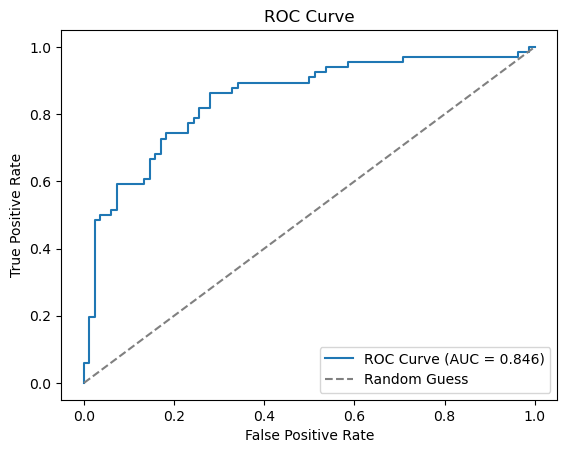

Tuned CatBoostClassifier AUC Score = 0.846


In [43]:
# Creating tuned CatBoost Model
tuned_cb = CatBoostClassifier(**catboost_best_params,  # Adding the best parameters to the model
                              verbose = False,
                              random_state = 42)

tuned_cb.fit(X_train, y_train)
y_pred = tuned_cb.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_pred)

#  Plotting the AUC-ROC curve and printing the AUC score

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = 'ROC Curve (AUC = %0.3f)' % auc_score)
plt.plot([0,1], [0,1], linestyle = '--', color = 'grey', label = 'Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f'Tuned CatBoostClassifier AUC Score = {auc_score:.3f}')

#### RandomForestClassifier

In [44]:
def tuning_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 1000, step = 50)
    max_depth = trial.suggest_int('max_depth', 2, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    rf = RandomForestClassifier(n_estimators = n_estimators,
                             max_depth = max_depth,
                             min_samples_split = min_samples_split,
                             min_samples_leaf = min_samples_leaf,
                             random_state = 42)

    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_test)[:,1]
    auc_score = roc_auc_score(y_test, y_pred)

    return auc_score

In [45]:
study = optuna.create_study(direction = 'maximize')
study.optimize(tuning_rf, n_trials = 500)

[I 2023-04-07 19:17:33,623] A new study created in memory with name: no-name-25ab95f1-ad42-4033-aa58-49ef3c1662c5
[I 2023-04-07 19:17:35,911] Trial 0 finished with value: 0.8296378418329637 and parameters: {'n_estimators': 950, 'max_depth': 27, 'min_samples_split': 19, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8296378418329637.
[I 2023-04-07 19:17:36,442] Trial 1 finished with value: 0.8307464892830747 and parameters: {'n_estimators': 300, 'max_depth': 47, 'min_samples_split': 20, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.8307464892830747.
[I 2023-04-07 19:17:36,936] Trial 2 finished with value: 0.8281596452328159 and parameters: {'n_estimators': 250, 'max_depth': 45, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8307464892830747.
[I 2023-04-07 19:17:38,790] Trial 3 finished with value: 0.8294530672579453 and parameters: {'n_estimators': 950, 'max_depth': 22, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 1 with va

In [46]:


rf_best_params = study.best_params
rf_best_score = study.best_value
print(f"Best params: {rf_best_params}")
print(f"Best score: {rf_best_score:.3f}")



Best params: {'n_estimators': 50, 'max_depth': 32, 'min_samples_split': 15, 'min_samples_leaf': 2}
Best score: 0.839


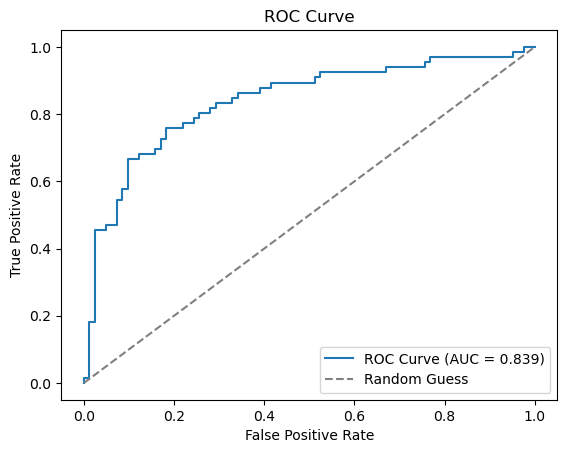

Tuned RandomForestClassifier AUC Score = 0.839


In [47]:
tuned_rf = RandomForestClassifier(**rf_best_params,
                                  random_state = 42)

tuned_rf.fit(X_train, y_train)
y_pred = tuned_rf.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = 'ROC Curve (AUC = %0.3f)' % auc_score)
plt.plot([0,1], [0,1], linestyle = '--', color = 'grey', label = 'Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f'Tuned RandomForestClassifier AUC Score = {auc_score:.3f}')

#### Logistic Regression

In [48]:
def tuning_logistic(trial):
    C = trial.suggest_float('C', 1e-3, 1e3, log = True)
    penalty = trial.suggest_categorical('penalty', ['none','l1', 'l2'])
    if penalty == 'l1':
        solver = 'saga'
    else:
        solver = 'lbfgs'

    logistic = LogisticRegression(C = C, penalty = penalty, solver = solver, random_state = 42)

    logistic.fit(X_train, y_train)
    y_pred = logistic.predict_proba(X_test)[:,1]
    auc_score = roc_auc_score(y_test, y_pred)

    return auc_score

In [49]:


study_logistic = optuna.create_study(direction = 'maximize')
study_logistic.optimize(tuning_logistic, n_trials = 500)



[I 2023-04-07 19:19:49,307] A new study created in memory with name: no-name-a25eb499-aa10-4360-8ab0-5bcd5fbe517b
[I 2023-04-07 19:19:49,325] Trial 0 finished with value: 0.8078344419807834 and parameters: {'C': 34.54861266369085, 'penalty': 'l2'}. Best is trial 0 with value: 0.8078344419807834.
[I 2023-04-07 19:19:49,340] Trial 1 finished with value: 0.808019216555802 and parameters: {'C': 123.58639693751917, 'penalty': 'none'}. Best is trial 1 with value: 0.808019216555802.
[I 2023-04-07 19:19:49,352] Trial 2 finished with value: 0.5 and parameters: {'C': 0.0027254900615728424, 'penalty': 'l1'}. Best is trial 1 with value: 0.808019216555802.
[I 2023-04-07 19:19:49,365] Trial 3 finished with value: 0.808019216555802 and parameters: {'C': 50.25634856913234, 'penalty': 'none'}. Best is trial 1 with value: 0.808019216555802.
[I 2023-04-07 19:19:49,376] Trial 4 finished with value: 0.808019216555802 and parameters: {'C': 232.16594466267173, 'penalty': 'none'}. Best is trial 1 with value: 

In [50]:
logistic_best_params = study_logistic.best_params
logistic_best_score = study_logistic.best_value
print(f"Best params: {logistic_best_params}")
print(f"Best score: {logistic_best_score:.3f}")

Best params: {'C': 0.01648262565798813, 'penalty': 'l1'}
Best score: 0.816


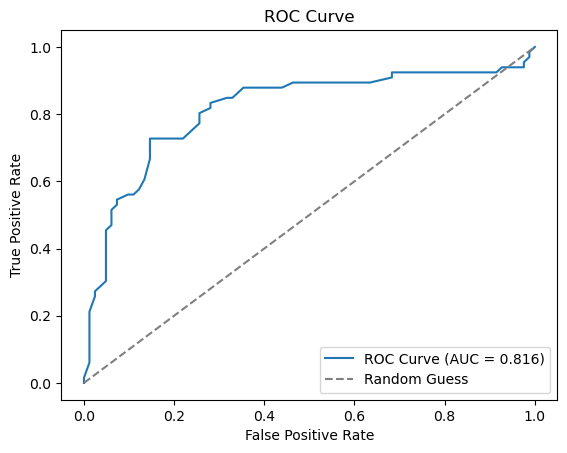

Tuned LogisticRegression AUC Score = 0.816


In [51]:
tuned_logreg = LogisticRegression(**logistic_best_params,
                                  random_state = 42, solver = 'saga')

tuned_logreg.fit(X_train, y_train)
y_pred = tuned_logreg.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = 'ROC Curve (AUC = %0.3f)' % auc_score)
plt.plot([0,1], [0,1], linestyle = '--', color = 'grey', label = 'Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f'Tuned LogisticRegression AUC Score = {auc_score:.3f}')

Observation : The tunings worked quite well and we've been able to achieve even higher AUC scores for our models.

We get the best result of our top 3 classifier , and we optimized their parameters 

Lets make the ensemble learning to get better result

## Ensembling Models

Now we're going to use Sklearn's StackingClassifier to create a meta model by ensembling the tuned CatBoost, the tuned RandomForest, and the tuned LogisticRegression all together.


Ensemble model AUC score = 0.841



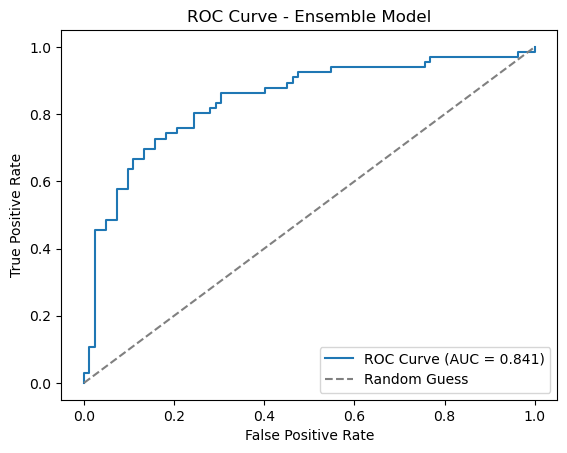

In [52]:
# Creating meta model
ensemble_model = StackingClassifier(estimators=[('CatBoost', tuned_cb),
                                             ('RandomForest', tuned_rf),
                                             ('LogisticRegression', tuned_logreg)],
                                 cv=5)

ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_pred)
print(f'\nEnsemble model AUC score = {auc_score:.3f}\n')

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = 'ROC Curve (AUC = %0.3f)' % auc_score)
plt.plot([0,1], [0,1], linestyle = '--', color = 'grey', label = 'Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Model')
plt.legend()
plt.show()

We have two different models with the highest scores:


Tuned CatBoostClassifier, with an AUC score of 0.848

Ensemble Model with an AUC score of 0.842 (our ensemble model is not good enough)

## Making Final Predictions - Tuned CatBoost Model

In [53]:
# Visualizing test set
test

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31
272,686,1.012,5.62,410,14.0,195,1.45
273,687,1.031,5.68,874,29.0,380,4.49
274,688,1.019,5.47,543,21.4,170,1.64


In [54]:
test = test.set_index('id') # Removing the index and selecting 'Id' as index

In [55]:
test = pipeline.transform(test) # Passing the test set through the pipeline

In [56]:
_pred = tuned_cb.predict_proba(test)[:,1] # Performing Predictions
y_pred

array([0.50288182, 0.74674974, 0.76758671, 0.18514695, 0.47717606,
       0.17846776, 0.74398422, 0.37937521, 0.74600237, 0.27698272,
       0.14922234, 0.76334972, 0.76560486, 0.57421979, 0.65724443,
       0.37896393, 0.42519684, 0.31932366, 0.64809981, 0.39920188,
       0.76771431, 0.77511801, 0.79139022, 0.71422279, 0.72782374,
       0.1732666 , 0.597759  , 0.41954729, 0.73150285, 0.61529012,
       0.60978658, 0.79220184, 0.1775668 , 0.22245462, 0.75223207,
       0.18839528, 0.79194886, 0.52059138, 0.26939708, 0.50519207,
       0.18226006, 0.68278001, 0.36844727, 0.27365476, 0.36151015,
       0.27099324, 0.75971043, 0.41149938, 0.59756332, 0.57333329,
       0.48637842, 0.63405688, 0.19816466, 0.56108954, 0.58975811,
       0.20669111, 0.29118008, 0.22205977, 0.18193247, 0.63247851,
       0.25976192, 0.68720227, 0.21928496, 0.16200093, 0.20726759,
       0.31370408, 0.17598953, 0.24436642, 0.4969889 , 0.44475131,
       0.14747838, 0.79581581, 0.17543599, 0.65882184, 0.32410

In [57]:
# Loading submission dataframe
submission = pd.read_csv('sample_submission.csv')
submission

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5
...,...,...
271,685,0.5
272,686,0.5
273,687,0.5
274,688,0.5
